         DATE  Observed  Predicted  CI Lower (Std)  CI Upper (Std)
12 2010-01-01      0.11  -1.093302       -1.782727       -0.403877
13 2010-02-01      0.13  -0.995398       -1.644552       -0.346243
14 2010-03-01      0.16  -1.064547       -1.750299       -0.378795
15 2010-04-01      0.20  -1.082457       -1.786384       -0.378530
16 2010-05-01      0.20  -1.048915       -1.738903       -0.358928


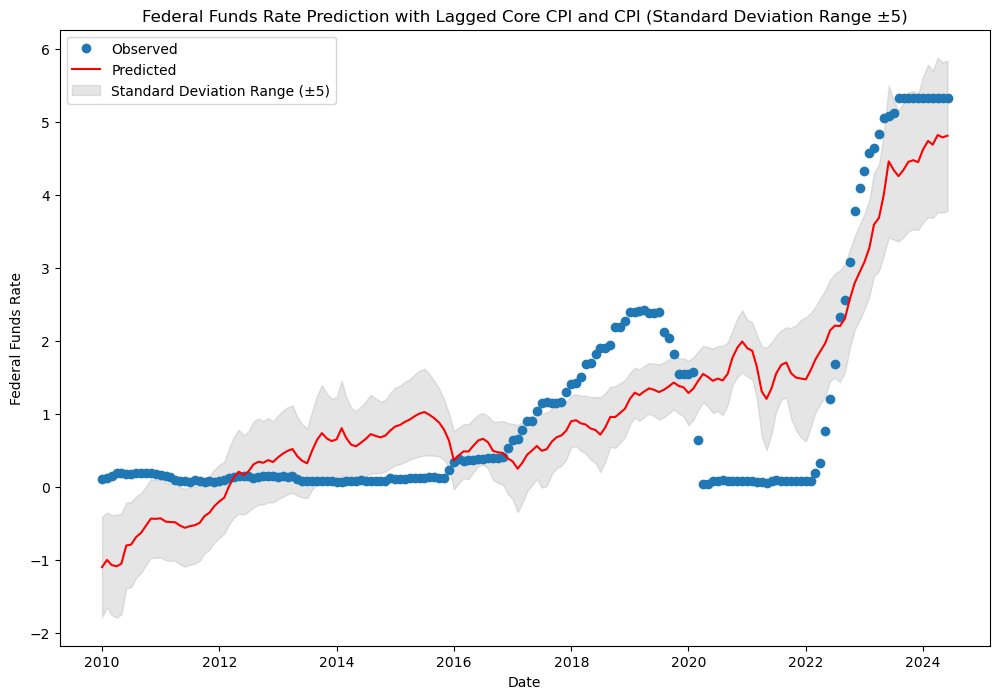

In [9]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 파일 경로
core_cpi_path = './../Fed2_dataset/Core CPI/CPILFESL.csv'
cpi_path = './../Fed2_dataset/CPI/CPIAUCSL.csv'
fed_funds_path = './../Fed2_dataset/FedRate/FEDFUNDS.csv'

# 데이터 불러오기
core_cpi_df = pd.read_csv(core_cpi_path)
cpi_df = pd.read_csv(cpi_path)
fed_funds_df = pd.read_csv(fed_funds_path)

# 날짜 형식 변환
core_cpi_df['DATE'] = pd.to_datetime(core_cpi_df['DATE'])
cpi_df['DATE'] = pd.to_datetime(cpi_df['DATE'])
fed_funds_df['DATE'] = pd.to_datetime(fed_funds_df['DATE'])

# 시차 적용
core_cpi_df['CORE_CPI_LAG6'] = core_cpi_df['CPILFESL'].shift(6)
cpi_df['CPI_LAG12'] = cpi_df['CPIAUCSL'].shift(12)

# 데이터 병합
merged_df = core_cpi_df[['DATE', 'CORE_CPI_LAG6']].merge(cpi_df[['DATE', 'CPI_LAG12']], on='DATE')
merged_df = merged_df.merge(fed_funds_df, on='DATE')

# 결측값 제거 (시차로 인해 생긴 NaN)
merged_df = merged_df.dropna()

# 컬럼명 정리
merged_df.columns = ['DATE', 'CORE_CPI_LAG6', 'CPI_LAG12', 'FED_FUNDS']

# 독립 변수와 종속 변수 설정
X = merged_df[['CORE_CPI_LAG6', 'CPI_LAG12']]
y = merged_df['FED_FUNDS']

# 상수항 추가
X = sm.add_constant(X)

# 회귀 모델 피팅
model = sm.OLS(y, X).fit()

# 예측값 계산
predictions = model.get_prediction(X)
pred_summary = predictions.summary_frame(alpha=0.05)  # 95% 신뢰 구간

# 예측값, 하한값, 상한값
pred_mean = pred_summary['mean']
pred_mean_se = pred_summary['mean_se']

# 표준편차의 +-5 범위 계산
ci_lower_std = pred_mean - 5 * pred_mean_se
ci_upper_std = pred_mean + 5 * pred_mean_se

# 결과 데이터프레임 생성
result = pd.DataFrame({
    'DATE': merged_df['DATE'],
    'Observed': y,
    'Predicted': pred_mean,
    'CI Lower (Std)': ci_lower_std,
    'CI Upper (Std)': ci_upper_std
})

# 결과 데이터프레임 출력
print(result.head())

# 그래프 시각화 및 저장
plt.figure(figsize=(12, 8))
plt.plot(result['DATE'], result['Observed'], 'o', label='Observed')
plt.plot(result['DATE'], result['Predicted'], 'r-', label='Predicted')
plt.fill_between(result['DATE'], result['CI Lower (Std)'], result['CI Upper (Std)'], color='gray', alpha=0.2, label='Standard Deviation Range (±5)')
plt.xlabel('Date')
plt.ylabel('Federal Funds Rate')
plt.title('Federal Funds Rate Prediction with Lagged Core CPI and CPI (Standard Deviation Range ±5)')
plt.legend()

# 그래프를 파일로 저장
plt.savefig('fed_funds_rate_prediction_lagged.png')

# 그래프 표시
plt.show()


In [1]:
ls

SemiProject1 copy.ipynb
